In [1]:
import numpy as np
import pandas as pd
import cbsodata
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [2]:
#toc = pd.DataFrame(cbsodata.get_table_list())
#toc
info = cbsodata.get_info('70895ned') # Returns a dict with info
[info.get(key) for key in ['Title', 'Modified']]

['Overledenen; geslacht en leeftijd, per week', '2022-12-23T02:00:00']

In [3]:
data = pd.DataFrame(cbsodata.get_data('70895ned'))
data.dropna(subset = ["Overledenen_1"], inplace=True)
df=data[data.Perioden.str.contains('week')]
df=df[df.Perioden.str.contains('1995 week 0')==False].reset_index(drop=True)
df.iloc[1430:1440]

,ID,Geslacht,LeeftijdOp31December,Perioden,Overledenen_1
1430,1457,Totaal mannen en vrouwen,Totaal leeftijd,2021 week 52 (5 dagen),2728.0
1431,1459,Totaal mannen en vrouwen,Totaal leeftijd,2022 week 0 (2 dagen),954.0
1432,1460,Totaal mannen en vrouwen,Totaal leeftijd,2022 week 1,3435.0
1433,1461,Totaal mannen en vrouwen,Totaal leeftijd,2022 week 2,3157.0
1434,1462,Totaal mannen en vrouwen,Totaal leeftijd,2022 week 3,3192.0
1435,1463,Totaal mannen en vrouwen,Totaal leeftijd,2022 week 4,3202.0
1436,1464,Totaal mannen en vrouwen,Totaal leeftijd,2022 week 5,3286.0
1437,1465,Totaal mannen en vrouwen,Totaal leeftijd,2022 week 6,3254.0
1438,1466,Totaal mannen en vrouwen,Totaal leeftijd,2022 week 7,3378.0
1439,1467,Totaal mannen en vrouwen,Totaal leeftijd,2022 week 8,3351.0


In [26]:
df_clean = df.drop(columns = ['ID'])
df_clean['to_first_week']=df_clean.Perioden.str.contains('dag') & df_clean.Perioden.str.contains('week 1')
df_clean['to_last_week']=df_clean.Perioden.str.contains('dag') & df_clean.Perioden.shift(-1).str.contains('week 0')
df_clean['partial_week']=df_clean.Perioden.str.contains('dag')
df_clean.loc[df_clean['to_first_week'] == True, 'deaths'] = df_clean['Overledenen_1'].shift(+1) + df_clean['Overledenen_1'] 
df_clean.loc[df_clean['to_last_week'] == True, 'deaths'] = df_clean['Overledenen_1'].shift(-1) + df_clean['Overledenen_1'] 
df_clean.loc[df_clean['partial_week'] == False, 'deaths'] = df_clean['Overledenen_1']
df_clean = df_clean.dropna(subset = ["deaths"]).reset_index(drop=True)
df_clean[['year','week']] = df_clean.Perioden.str.split("week",expand=True)
df_clean['week'] = df_clean.week.str.extract('(\d+)')
df_clean['year'] = df_clean.year.str.extract('(\d+)')
df_clean['week'] =pd.to_numeric(df_clean['week'])
df_clean['year'] =pd.to_numeric(df_clean['year'])
df_clean['deaths'] =pd.to_numeric(df_clean['deaths'])
df_clean = df_clean.drop(columns = ['Overledenen_1','to_first_week','to_last_week','partial_week'])
df_clean = df_clean.rename(columns={"LeeftijdOp31December": "age", "Geslacht": "gender"})
df_clean = df_clean[['Perioden','gender','age','year','week','deaths']]

#remove this line to get the full time period
df_clean=df_clean[df_clean.year >= 2010].reset_index(drop=True)

df_clean['covid_year']=df_clean['year'] >= 2020
df_clean.loc[df_clean['covid_year'] == False, 'covid_year'] = '2010-2019 +/- SD'
df_clean.loc[df_clean['covid_year'] == True, 'covid_year'] = df_clean['year']
df_clean.iloc[610:620]

,Perioden,gender,age,year,week,deaths,covid_year
610,2021 week 37,Totaal mannen en vrouwen,Totaal leeftijd,2021,37,2919.0,2021
611,2021 week 38,Totaal mannen en vrouwen,Totaal leeftijd,2021,38,2890.0,2021
612,2021 week 39,Totaal mannen en vrouwen,Totaal leeftijd,2021,39,3072.0,2021
613,2021 week 40,Totaal mannen en vrouwen,Totaal leeftijd,2021,40,3072.0,2021
614,2021 week 41,Totaal mannen en vrouwen,Totaal leeftijd,2021,41,3064.0,2021
615,2021 week 42,Totaal mannen en vrouwen,Totaal leeftijd,2021,42,3275.0,2021
616,2021 week 43,Totaal mannen en vrouwen,Totaal leeftijd,2021,43,3388.0,2021
617,2021 week 44,Totaal mannen en vrouwen,Totaal leeftijd,2021,44,3518.0,2021
618,2021 week 45,Totaal mannen en vrouwen,Totaal leeftijd,2021,45,3788.0,2021
619,2021 week 46,Totaal mannen en vrouwen,Totaal leeftijd,2021,46,4005.0,2021


/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be r

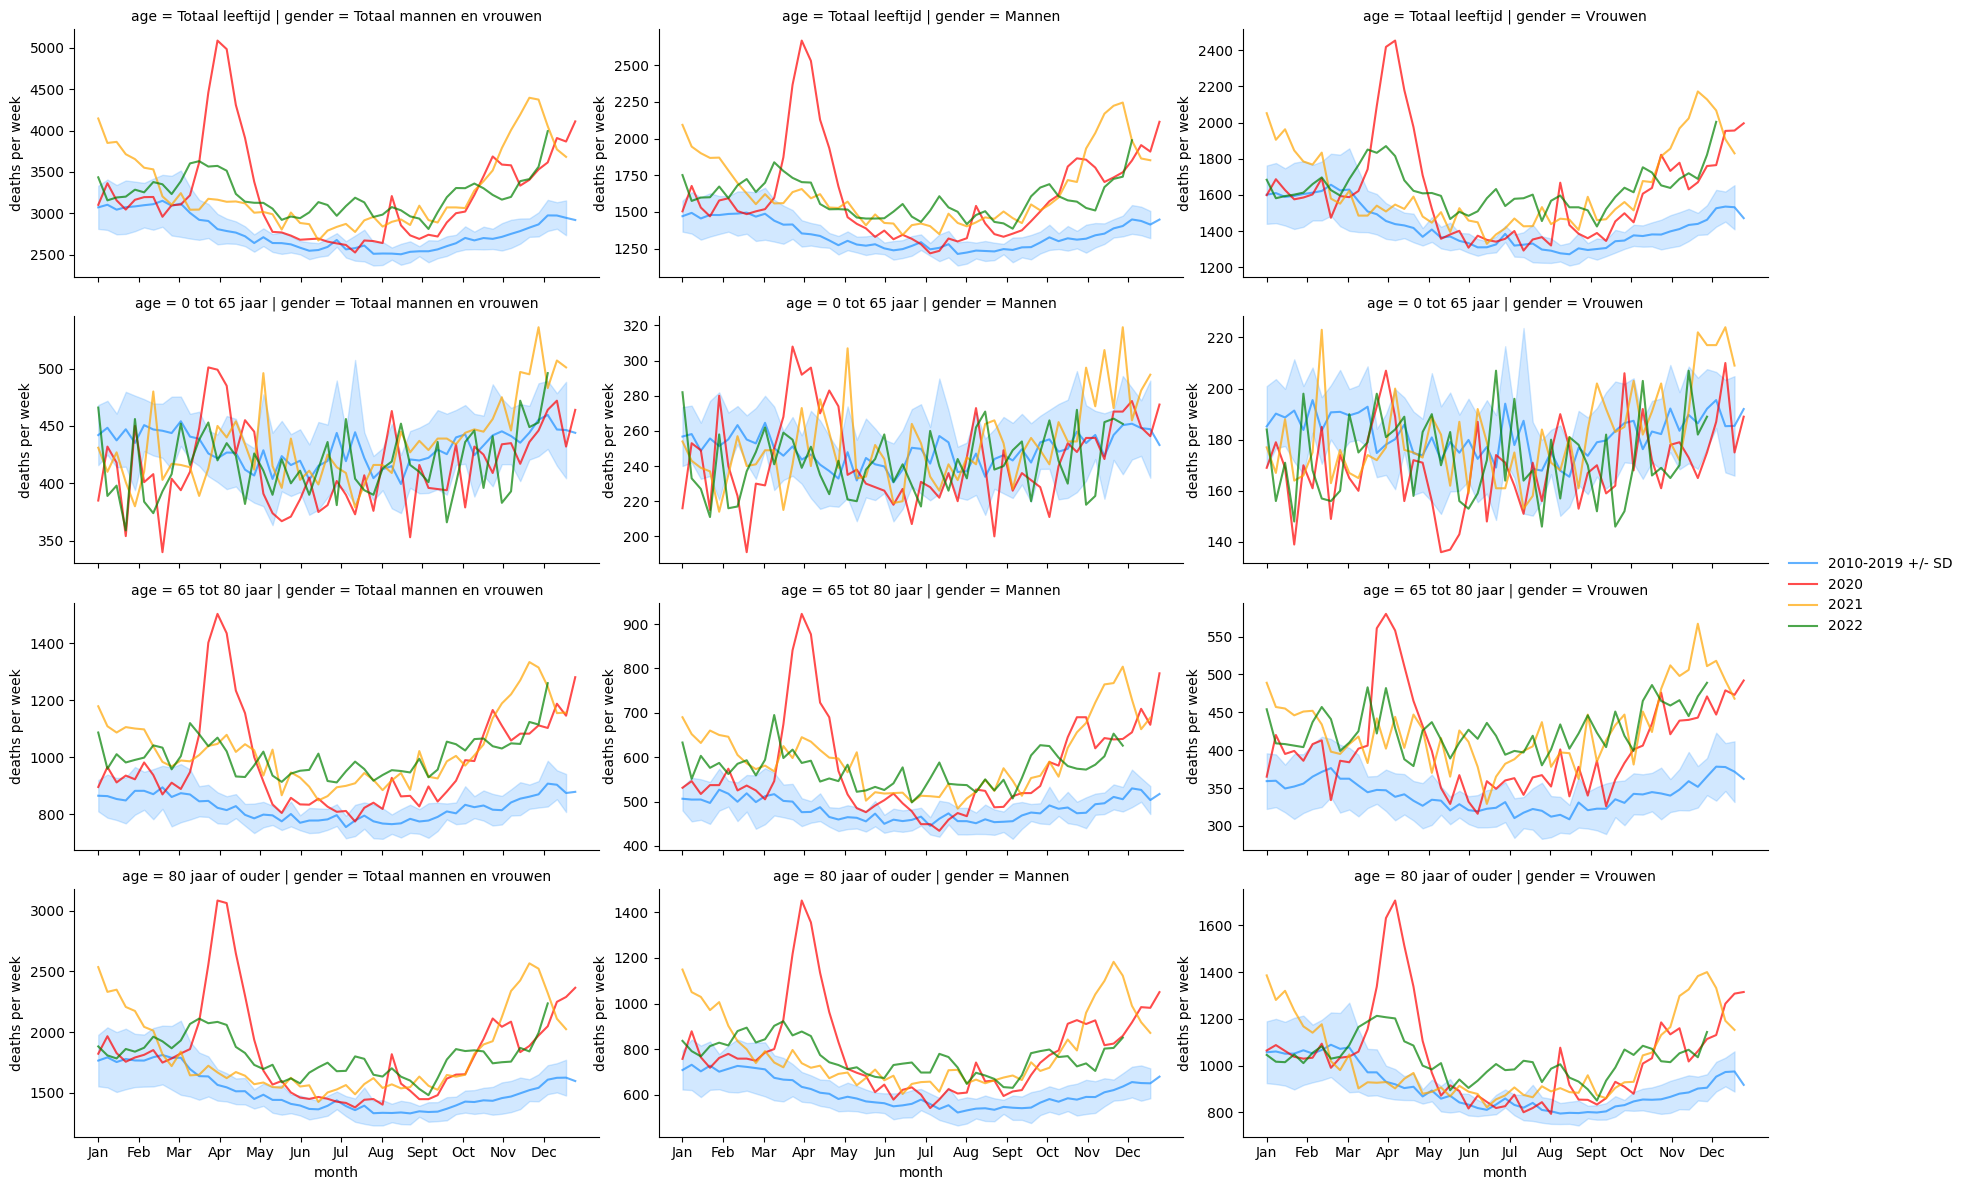

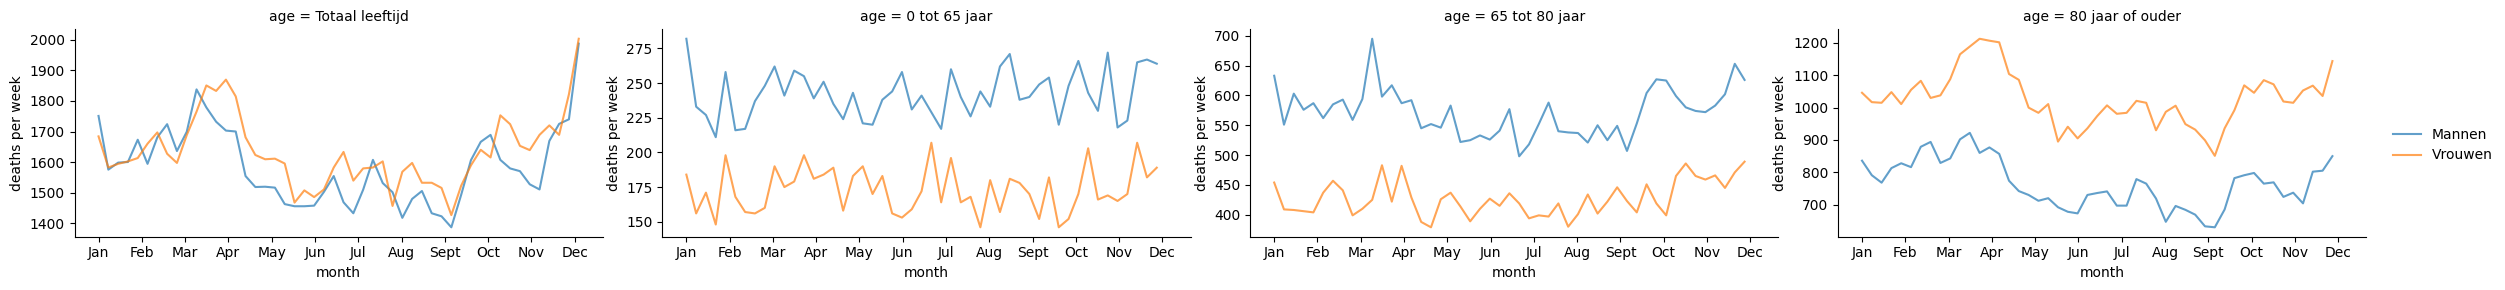

In [29]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
current_year = df_clean['year'].max()

g = sns.FacetGrid(df_clean, col="gender", hue="covid_year", palette=["dodgerblue","red","orange", "green"], row='age', aspect=2,sharey=False)
g.map(sns.lineplot, 'week', 'deaths', alpha=.7, estimator='mean', errorbar='sd')
g.set(xlabel="month", ylabel = "deaths per week", xticks=np.arange(1, 53,(53/12) ), xticklabels=months)
g.add_legend(title = '')
for suffix in 'png svg'.split():
    g.savefig('naar_Geslacht_leeftijd.'+suffix, dpi=200, bbox_inches='tight', facecolor='white')

g = sns.FacetGrid(df_clean.query("year == @current_year & gender !='Totaal mannen en vrouwen'"), col="age", hue="gender", aspect=2,sharey=False)
g.map(sns.lineplot, 'week', 'deaths', alpha=.7)
g.set(xlabel="month", ylabel = "deaths per week", xticks=np.arange(1, 53,(53/12) ), xticklabels=months)
g.add_legend(title = '')
for suffix in 'png svg'.split():
    g.savefig('current_year_leeftijd.'+suffix, dpi=200, bbox_inches='tight', facecolor='white')

/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be r

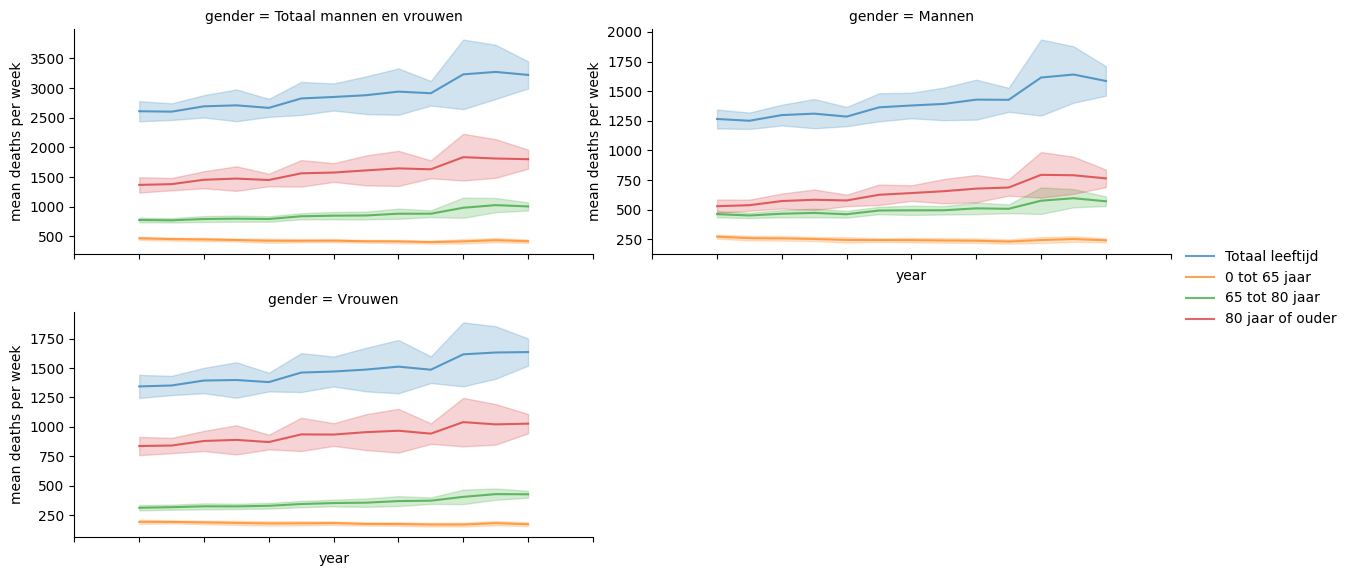

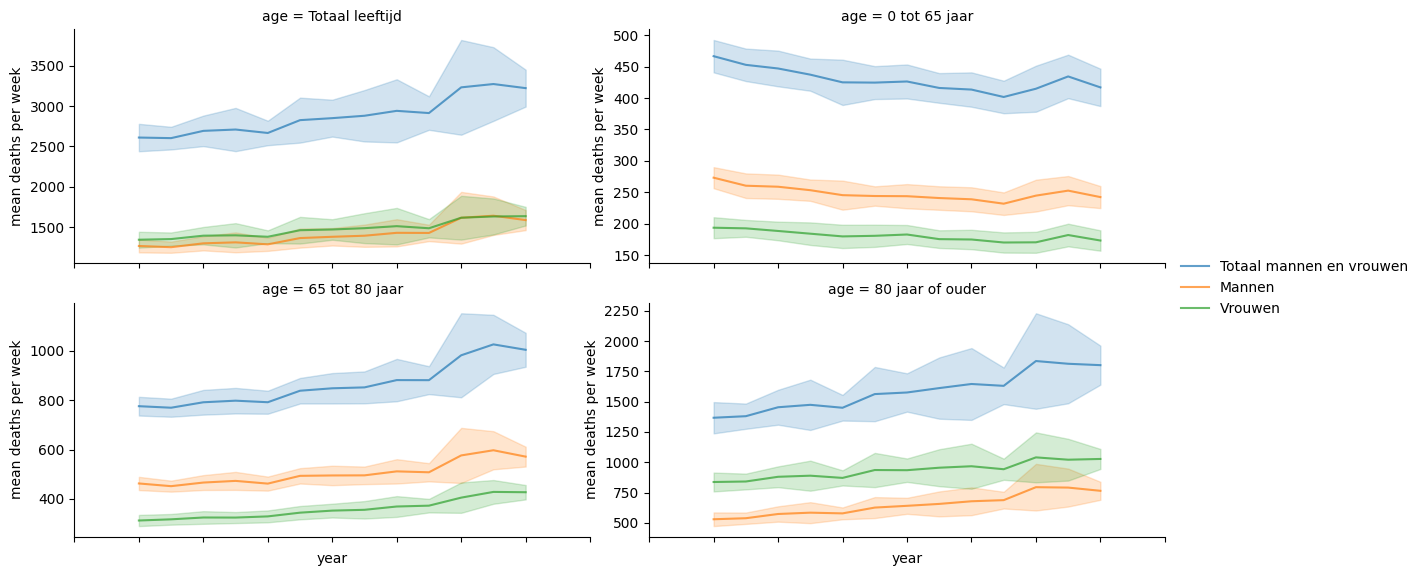

In [31]:
g = sns.FacetGrid(df_clean, col="gender", hue="age", col_wrap=2, aspect=2,sharey=False)
g.map(sns.lineplot, 'year', 'deaths', alpha=.7, estimator='mean', errorbar='sd')
g.set(xlabel="year", ylabel = "mean deaths per week")
g.set_xticklabels(rotation=90)
g.add_legend(title = '')
g.savefig('perjaar_Geslacht.svg', bbox_inches='tight', facecolor='white')

g = sns.FacetGrid(df_clean, col="age", hue="gender",col_wrap=2, aspect=2,sharey=False)
g.map(sns.lineplot, 'year', 'deaths', alpha=.7, estimator='mean', errorbar='sd')
g.set(xlabel="year", ylabel = "mean deaths per week")
g.set_xticklabels(rotation=90)
g.add_legend(title = '')
g.savefig('perjaar_leeftijd.svg', bbox_inches='tight', facecolor='white')

In [32]:
leeftijd='Totaal leeftijd'
#leeftijd='0 tot 65 jaar'
#leeftijd='65 tot 80 jaar'
#leeftijd='80 jaar of ouder'
sex='Totaal mannen en vrouwen'
#sex='Mannen'
#sex='Vrouwen'

df_circle=df_clean[(df_clean.age == leeftijd) & (df_clean.gender == sex)]
df_circle = df_circle.groupby(['year','week'])['deaths'].sum().squeeze()
df_circle

year  week
2010  1       2767.0
      2       2830.0
      3       2846.0
      4       2865.0
      5       2858.0
               ...  
2022  46      3199.0
      47      3389.0
      48      3414.0
      49      3562.0
      50      3992.0
Name: deaths, Length: 676, dtype: float64

In [34]:
deaths_per_year = pd.DataFrame(columns=range(2010, int(current_year)+1), index=pd.RangeIndex(1, 53+1, name='week'))

for Perioden, deaths in df_circle.items():
    year = int(Perioden[0:4])
    week = int(Perioden[9:12])
    deaths_per_year.loc[week, year] = deaths

deaths_per_year

SyntaxError: cannot assign to function call (3083952743.py, line 3)

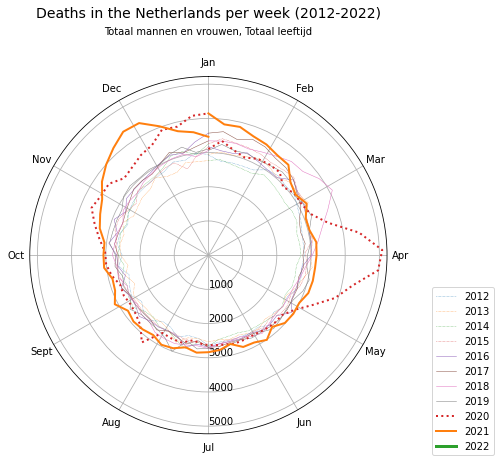

In [38]:
def data_for_year(y):
    year = deaths_per_year[y].dropna().to_numpy()
    if y == int(current_year):
        num_weeks = len(year)
        day_of_the_year = num_weeks*7 + 3 # ex. week 46 -> november 15 -> day 319
        theta = np.linspace(0, (day_of_the_year/365)*2*np.pi, num_weeks)
    else:
        # append first week of next year for correct radial plotting
        year = np.append(year, deaths_per_year.loc[1, y+1])
        theta = np.linspace(0, 2*np.pi, len(year))
    return (theta, year)

def plot_year(ax, y, **kwargs):
    ax.plot(*data_for_year(y), label=f"{y}", **kwargs)

def setup_polar_plot(figsize=(8, 6), constrained_layout=True):
    fig = plt.figure(figsize=figsize, constrained_layout=constrained_layout)
    ax = fig.add_subplot(111, projection='polar')

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_xticks(np.arange(0, 2*np.pi, np.pi/6))
    ax.set_xticklabels(months)

    ax.set_rlabel_position(180)
#    ax.set_yticklabels(['1000', '2000', '3000', '4000', '5000', ''])

    return fig, ax

fig, ax = setup_polar_plot()
plot_year(ax, int(current_year)-10, linewidth=0.5, linestyle='dotted')
plot_year(ax, int(current_year)-9, linewidth=0.5, linestyle='dotted')
plot_year(ax, int(current_year)-8, linewidth=0.5, linestyle='dotted')
plot_year(ax, int(current_year)-7, linewidth=0.5, linestyle='dotted')
plot_year(ax, int(current_year)-6, linewidth=0.5)
plot_year(ax, int(current_year)-5, linewidth=0.5)
plot_year(ax, int(current_year)-4, linewidth=0.5)
plot_year(ax, int(current_year)-3, linewidth=0.5)
plot_year(ax, int(current_year)-2, color='tab:red', linewidth=2, linestyle='dotted')
plot_year(ax, int(current_year)-1, color='tab:orange', linewidth=2)
plot_year(ax, int(current_year), color='tab:green', linewidth=3)

fig.legend(loc='lower right')
fig.suptitle('Deaths in the Netherlands per week ('+str(int(current_year)-10)+'-'+current_year+')', fontsize=14, y=1.04)
ax.set_title(f"{sex}, {leeftijd}", fontsize=10, y=1.1)
for suffix in 'png svg'.split():
    plt.savefig('sterfte_perjaar.'+suffix, dpi=200, bbox_inches='tight', facecolor='white')

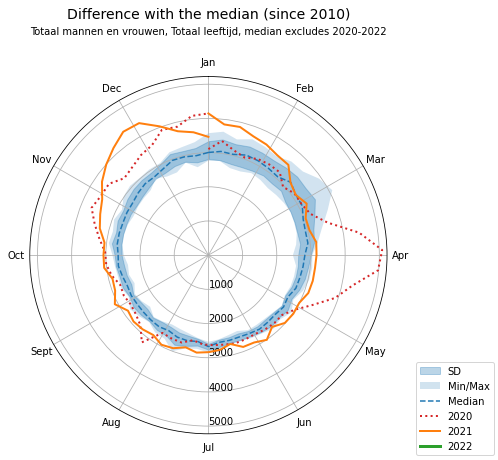

In [39]:
years = deaths_per_year.loc[:, ~deaths_per_year.columns.isin([2020, 2021,int(current_year)])] # excluding corona years and current year

mean = years.mean(skipna=True,axis=1)
mean[53] = mean[1]

median = years.median(skipna=True,axis=1)
median[53] = median[1]

min = years.min(axis=1)
min[53] = min[1]

max = years.max(axis=1)
max[53] = max[1]

sd = years.std(axis=1)
sd[53] = sd[1]

q25 = deaths_per_year.astype(float).quantile(0.25, axis=1)
q25[53] = q25[1]

q75 = deaths_per_year.astype(float).quantile(0.75, axis=1)
q75[53] = q75[1]

fig, ax = setup_polar_plot()

# ax.plot(np.linspace(0, 2*np.pi, len(mean)), mean, label="5y mean")
# ax.plot(np.linspace(0, 2*np.pi, len(data_for_year(2019))), data_for_year(2019), label="2019")
ax.fill_between(np.linspace(0, 2*np.pi, len(min)), mean+sd, mean-sd, alpha=0.3, label="SD", color='tab:blue')

ax.fill_between(np.linspace(0, 2*np.pi, len(min)), min, max, alpha=0.2, label="Min/Max")
#ax.fill_between(np.linspace(0, 2*np.pi, len(q25)), q25, q75, alpha=0.3, label="50%", color='tab:green')

ax.plot(np.linspace(0, 2*np.pi, len(median)), median, label="Median", linestyle='dashed')
plot_year(ax, int(current_year)-2, color='tab:red', linewidth=2, linestyle='dotted')
plot_year(ax, int(current_year)-1, color='tab:orange', linewidth=2)
plot_year(ax, int(current_year), color='tab:green', linewidth=3)


#ax.set_rmax(5500)
fig.legend(loc='lower right')
fig.suptitle(f"Difference with the median (since 2010)", fontsize=14, y=1.04)
ax.set_title(f"{sex}, {leeftijd}, median excludes 2020-2022", fontsize=10, y=1.1)
for suffix in 'png svg'.split():
    plt.savefig('sterfte_median.'+suffix, dpi=200, bbox_inches='tight', facecolor='white')

done


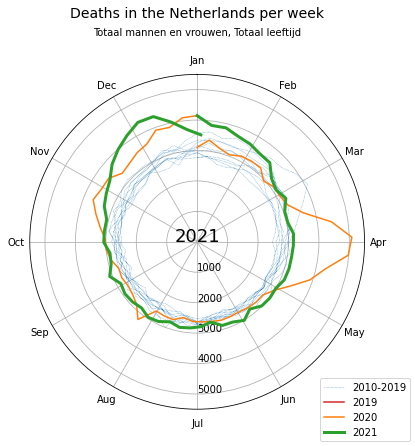

In [27]:
start_year = 2010

fig, ax = setup_polar_plot(figsize=(6, 6.2), constrained_layout=False)

# english month labels
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# nudge ax position
pos = ax.get_position()
pos.y0 -= 0.05
pos.y1 -= 0.05
pos.x0 -= 0.012
pos.x1 -= 0.012
ax.set_position(pos)

fig.suptitle("Deaths in the Netherlands per week", fontsize=14)
ax.set_title(f"{sex}, {leeftijd}", fontsize=10, y=1.1)


old, = ax.plot([], [], color='tab:blue', linewidth=0.5, linestyle='dotted', label="2010-2019")
prevprev, = ax.plot([], [], color='tab:red', label=int(current_year)-2)
prev, = ax.plot([], [], color='tab:orange', label=int(current_year)-1)
current, = ax.plot([], [], color='tab:green', linewidth=3, label=int(current_year))
center = ax.text(0, 25, "5000", horizontalalignment='center', fontsize=18)
ax.set_rmax(5500)

def year_and_week_for_index(i):
    y = start_year
    while True:
        len_year = len(deaths_per_year[y].dropna()) + 1
        if len_year > i:
            return (y, i+1)
        else:
            y += 1
            i -= (len_year-1)

def data_for_index(i):
    y, w = year_and_week_for_index(i)
    #print(y, w)
    theta, year = data_for_year(y)
    return theta[:w], year[:w]

def init():
    old.set_data([], []) 
    prev.set_data([], []) 
    current.set_data([], []) 
    center.set_text("")
    return old, prev, current, center

def animate(i):
    y = year_and_week_for_index(i)[0]

    if y > start_year:
        old_theta = np.array([])
        old_data = np.array([])
        for year in range(start_year, y-1):
            theta, data = data_for_year(year)
            old_theta = np.append(old_theta, theta)
            old_data = np.append(old_data, data)
        old.set_data(old_theta, old_data)
        prev.set_data(*data_for_year(y-1))

    current.set_data(*data_for_index(i))
    center.set_text(f"{y}")
    return old, prev, current, center

num_frames = len(df_circle)

anim = mpl.animation.FuncAnimation(fig, animate, init_func=init, frames=num_frames, interval=50, blit=True) 
anim.save('sterfte_anim.mp4', writer='ffmpeg', dpi=300, extra_args=['-vf', 'tpad=stop_mode=clone:stop_duration=5'])
#anim.save(f"img/{sex}_{leeftijd}_anim.gif", writer='imagemagick', dpi=72, fps=30, savefig_kwargs={'facecolor': 'white'})
anim.save('sterfte_anim.gif', writer= PillowWriter(fps=30) , dpi=300)

fig.legend(loc='lower right')
plt.savefig('sterfte_anim.svg', bbox_inches='tight', facecolor='white')
print("done")